# MNIST Digital Recognition Project Notebook
05 Feb 2022

### BY SURBHI DHIR

# Overview

In this notebook, we will train models to recognize digits from a dataset of hand-written digits called MNIST ("Modified National Institute of Standards and Technology") which has been used for benchmarking image classifiers. One potential business application of algorithmic identification of handwritten writing is the automatic digitization of handwritten documents. A model which can recognize human handwriting could be used to create a program that takes handwritten documents as input and returns a digitized document such as a PDF as output. 

There are many applications for this technology, such as converting student handwriting on exams to a digital format so that answers can be more easily read and graded by the proctor. 

* MNIST is known as a "hello world" dataset because it's very basic. 
* Each image is 28 by 28 pixels, represented in the data by 784 columns (one for each pixel) holding a value of 0 to 255 to represent darkness of the pixel, with higher values being darker.
* The dataset has 60,000 data points for the training set and 10,000 for the testing set. We will execute three models (SVM, and CNN) on this dataset and see which one performs the "best." 
* To determine this, we will measure the accuracy of the model, or the number of digits it correctly identified over the total number of digits in the dataset.



### SVM:
Support vector machines (SVMs) are particular linear classifiers which are based on the margin maximization principle. They perform structural risk minimization, which improves the complexity of the classifier with the aim of achieving excellent generalization performance. The SVM accomplishes the classification task by constructing, in a higher dimensional space, the hyperplane that optimally separates the data into two categories.

### CNN:
Convolutional Neural Networks (CNN) are feed forward artificial neural networks. They are highly acclaimed for their performance in computer vision tasks. CNN was based on the visual cortex found in animals. CNN is made up of an input layer, hidden layers, and an output layer. The hidden layers include layers that perform convolutions. A convolution kernal slides along the input layer which creates a feature map. This feature map is then passed into the next layer. There are also pooling layers to reduce the dimensions of the data along the network.


### Sources & References


* https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python

* https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-73003-5_299

* https://analyticsindiamag.com/convolutional-neural-network-image-classification-overview/

* https://en.wikipedia.org/wiki/Convolutional_neural_network

* https://androidkt.com/get-the-roc-curve-and-auc-for-keras-model/

#  Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential

# Importing the mnist dataset 
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
%matplotlib

Using matplotlib backend: agg


# Data Split & Exploration

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
print("\n---\nX Train Data\n---\n")
print(train_X)
print("\n---\nY Train Data\n---\n")
print(train_y)
print("\n---\nX Test Data\n---\n")
print(test_X)
print("\n---\nY Test Data\n---\n")
print(test_y)


---
X Train Data
---

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

---
Y Train Data
---

[5 0 4 ... 5 6 8]

---
X Test Data
---

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ...

# Exploratory Data Analysis

In [ ]:
print("---\nX Train Data Shape\n---")
print(train_X.shape)
print("---\nY Train Data Shape\n---")
print(train_y.shape)
print("---\nX Test Data Shape\n---")
print(test_X.shape)
print("---\nY Test Data Shape\n---")
print(test_y.shape)

---
X Train Data Shape
---
(60000, 28, 28)
---
Y Train Data Shape
---
(60000,)
---
X Test Data Shape
---
(10000, 28, 28)
---
Y Test Data Shape
---
(10000,)


Inferences:
* There are 60,000 train images with 28x28 pixels (train_X) and 60,000 resulting digits after the images have been classified (train_Y). 
* Then there are 10,000 images to compare our models against. Now let's check that our pixel values are within an expected range.

In [ ]:
print("The max and min of the train_X data are: " + str(train_X.max()) + " and " + str(train_X.min()))
print("The max and min of the train_y data are: " + str(train_y.max()) + " and " + str(train_y.min()))
print("The max and min of the test_X data are: " + str(test_X.max()) + " and " + str(train_X.min()))
print("The max and min of the test_y data are: " + str(test_y.max()) + " and " + str(train_y.min()))

The max and min of the train_X data are: 255 and 0
The max and min of the train_y data are: 9 and 0
The max and min of the test_X data are: 255 and 0
The max and min of the test_y data are: 9 and 0


Inferences: 
* Each of the feature includes 0 to 255 pixels, while the target includes numbers from 0 to 9. Therefore our values are within the expected bounds.

# Data Visualization

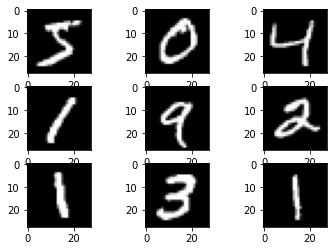

In [ ]:
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))


Inferences: 
* Above are examples of what an image in our dataset looks like. Now let's flatten the pixel data arrays so that we can run our models on them:

# Flattening dataset arrays

In [ ]:
train_X_flat = []
for i in range(len(train_X)):
  train_X_flat.append(train_X[i].flatten())

In [ ]:
test_X_flat = []
for i in range(len(test_X)):
  test_X_flat.append(test_X[i].flatten())

# Model Selection



We will comparing two classification models: 

* Convolutional Neural Networks (CNN),
* Support Vector Machines (SVM)

With the data that we gather, we will measure their accuracy and determine the best performing model to be the one with the greatest accuracy.

## Support Vector Machines


In [ ]:
#Import svm model
from sklearn import svm

#Scale our data
from sklearn import preprocessing
train_X_scaled = preprocessing.scale(train_X_flat)
test_X_scaled = preprocessing.scale(test_X_flat)

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=0.1) # Linear Kernel

#Train the model using the training sets
clf.fit(train_X_scaled, train_y)

#Predict the response for test dataset
pred_y = clf.predict(test_X_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Score : ", metrics.precision_score(test_y, pred_y, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Score : ", metrics.recall_score(test_y, pred_y, average='macro'))

Accuracy: 0.9376
Precision Score :  0.9372256008557274
Recall Score :  0.9365448727601307


Inferences:

* Test Accuracy of 93.7% can be achieved using the SVM model.

## Convolutional Neural Network


* The input layer into the Convolutional Neural Network that we created uses the train_X data.
* The train_X data and test_X data represent the data of the images.
* They have been converted into numpy arrays in order to be used to create the model.
* train_Y represents all the actual number values of the images from the train part of the dataset.


### One hot encode the labels for train and test data

In [ ]:
# categorizing the data into the 10 numbers in the dataset
train_y_matrix = to_categorical(y = train_y, num_classes = 10)

Inferences: 
* In this step, we have utilized the to_categorical to convert the train_y into a one-hot encoded matrix. 
* This converts the train_y array from ``[5, 0, 4, ..., 5, 6, 8]`` format to ``[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]`` format. The one in this array represents that the first row of train_y represents the number 1.

In [ ]:
# creating shape variable (removing the first index since that is not actually part of the shape, it's actually the number of images in the training dataset)
inputShape = np.shape(train_X)
inputShape = (inputShape[1], inputShape[2], 1)
inputShape

(28, 28, 1)

Inferences: 
* Creating the shape variable of the train_X variable. We have removed the first index, since it is simply a count of the number of images in the training dataset.

### Model Architecture Definition

In [ ]:
# creating the actual model using sequential
model = Sequential()

model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = inputShape)) # convolution layer 1
model.add(MaxPooling2D(pool_size = (2,2))) # pooling the data
model.add(Conv2D(64, kernel_size = (5,5), activation = 'relu')) # convolution layer 2
model.add(MaxPooling2D(pool_size = (2,2))) # pooling the data once again
model.add(Flatten()) # flattening the data
model.add(Dropout(0.25)) # performing drop out to regularize the data
model.add(Dense(100, activation = 'relu')) # applying ReLu activation function to the data
model.add(Dense(10, activation = 'softmax')) # applying softmax activation function to the data

Following steps have been taken to build up the layers for convolutional neural network.

Steps:
1. Add a convolution layer with 1 input layer and 32 output channels. I set the Kernel Size to be 5 by 5, which is the dimensions of the 2D convolution window. The activation function in this case is labeled as ReLu.
2. Next, I use a 2 by 2 max pooling to reduce the spatial dimensions of the output from the previous convolution layer step
3. Add another convolution layer with 32 input layer and 64 output channels. I also set the Kernel Size to be 5 by 5, which again is the dimensions of the 2D convolution window. The activation function in this case is once again labeled as ReLu.
4. Next, I use a 2 by 2 max pooling again to reduce the spatial dimensions of the output from the previous convolution layer step
5. After applying all those convolution layers, I need to flatten the data so that it can be passed into the next layers so that the network can be narrowed down into categorizing the image into one of the 10 number categories
6. I apply a dropout function with 25% probability of dropping to reduce overfitting between the layers
7. The dense layer that comes up next condenses the data into the size of 100 using the ReLu activation function
8. The last layer, another dense layer, condenses the data into the size of 10 using the SoftMax activation function so that images can categorized into one of the ten numbers (0 to 9)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0

### Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

Inference:

* We have utilized a categorical cross entropy loss function to have a better understand how well this convolutional neural network performed the task of digit recognition. 
* We have used cross entropy since I am dealing with a multi class classification.

In [ ]:
# Keras is expecting 4 dimensions so this will expand the dimensions
# categorizing the data into the 10 numbers in the dataset
train_X_Inflated = np.expand_dims(train_X, axis = 3)

### Fit and evaluate the model. Print the loss and accuracy for the test data

In [ ]:
# fitting the CNN model to our training data
model.fit(train_X_Inflated, train_y_matrix, epochs = 10, batch_size = 1000)

Epoch 1/10
60/60 [==============================] - 12s 40ms/step - loss: 3.7458 - accuracy: 0.6205
Epoch 2/10
60/60 [==============================] - 2s 40ms/step - loss: 0.2958 - accuracy: 0.9098
Epoch 3/10
60/60 [==============================] - 2s 40ms/step - loss: 0.1738 - accuracy: 0.9468
Epoch 4/10
60/60 [==============================] - 2s 40ms/step - loss: 0.1291 - accuracy: 0.9602
Epoch 5/10
60/60 [==============================] - 2s 40ms/step - loss: 0.1035 - accuracy: 0.9681
Epoch 6/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0889 - accuracy: 0.9725
Epoch 7/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0776 - accuracy: 0.9759
Epoch 8/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0706 - accuracy: 0.9776
Epoch 9/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0632 - accuracy: 0.9795
Epoch 10/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0580 - accuracy: 0.9819


Inferences: 
* We have fitted the training data to the convolutional neural network in this step. 
* We have included 10 epochs, which is running the entire model over the training data 10 times to increase the end accuracy of the model. We have included a batch size of 1000.

In [ ]:
# Keras is expecting 4 dimensions so this will expand the dimensions
test_X_inflated = np.expand_dims(test_X, axis = 3)
test_y_matrix = to_categorical(test_y, num_classes = 10)

In this step, we have expanded the dimensions of the test set x and updated the test set y to one-hot categorical. These are the necessary conversions required to run them through the model.

In [ ]:
# gathering the predictions
predict_x=model.predict(test_X_inflated) 
classes_x=np.argmax(predict_x,axis=1)

print("y_train shape: {}".format(np.shape(train_y_matrix)))
print("x_train shape: {}".format(np.shape(train_X_Inflated)))

print("y_test shape: {}".format(np.shape(test_y_matrix)))
print("x_test shape: {}".format(np.shape(test_X_inflated)))

y_train shape: (60000, 10)
x_train shape: (60000, 28, 28, 1)
y_test shape: (10000, 10)
x_test shape: (10000, 28, 28, 1)


In this step we have made the predictions by utilizing the inflated test x set.

### Evaluating the model

In [ ]:
# evaluate the accuracy and loss of the CNN model
evaluate = model.evaluate(test_X_inflated, test_y_matrix)
print("Loss: {}".format(evaluate[0]))
print("Accuracy: {}".format(evaluate[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0368 - accuracy: 0.9871
Loss: 0.0368431992828846
Accuracy: 0.9871000051498413


Inferences: 
* By using the evaluation function of model, we found the accuracy to be 98.98% accurate. There was a loss of 0.03968.

### Comparing Results to Predictions

In [ ]:
print(classes_x)
tempList = []

#this loop iterates through y_test and converts a format so we can compare to our predictions
for row in test_y_matrix:
    tempClass = np.argmax(row)
    tempList.append(tempClass)


test_y_Classes = np.array(tempList)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


Inferences: 
* We have converted the test y set so it can be compared to the predictions made.

In [ ]:
wrongPredictionIndices = []
i = 0

for actual, prediction in zip(test_y_Classes, classes_x):
    if actual != prediction:
        wrongPredictionIndices.append(i)
    i = i + 1

# these are the ten of indices of all the wrong predictions done by CNN
wrongPredictionIndices[:10]

Finally we collected all the indices of the wrongfully made predictions and presented them in the format of the array.

**Accuracy Table**

|Model | Accuracy |
|------|----------|
|**SVM**   | 93.76% |
|**CNN**   | 98.88% |

# Conclusion
Of the two models we built for the MNIST dataset ( SVM, and CNN), 

* CNN had the highest accuracy at 98.9%. 
* In addition, while SVM was very slow to complete and runs ever slower as dataset size increases, CNN was quick to execute.

Therefore, the model that performed the best on this dataset was CNN.



# THANK YOU!